In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("delaney_solubility_with_descriptors.csv")

df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# Splitting the df into the x(input/features/independent variables) and the y(output/dependent variable)

In [5]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [6]:
x = df.drop(columns = "logS")
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


# Splitting the data into training and testing set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 100 )

# Model Building - Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [37]:
methods_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
methods_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
methods_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


# Model Building - Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [44]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [46]:
methods_results.loc[1] = ["Random Forest", rf_train_mse , rf_train_r2, rf_test_mse ,rf_test_r2] 

In [47]:
methods_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


# Data Visualization

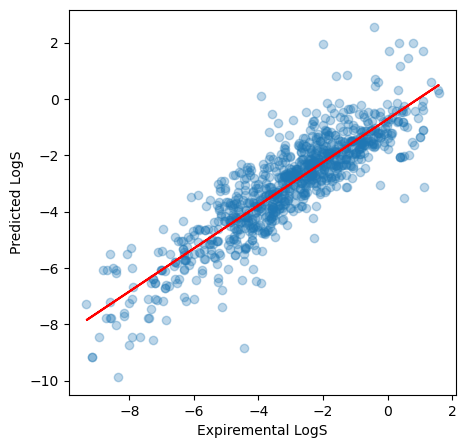

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(x= y_train, y = y_lr_train_pred,alpha = 0.3)
fit = np.polyfit(y_train, y_lr_train_pred, 1)
line = np.poly1d(fit)
plt.plot(y_train,line(y_train), c = 'red')
plt.ylabel("Predicted LogS")
plt.xlabel("Expiremental LogS")


plt.plot();

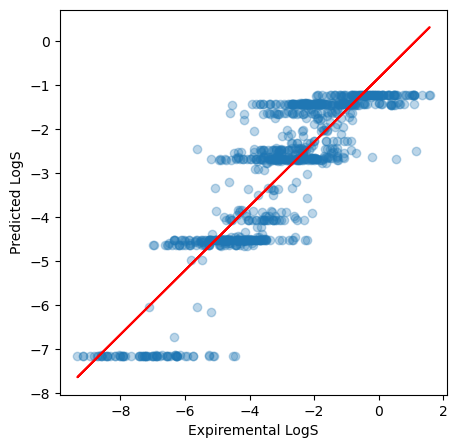

In [73]:
plt.figure(figsize = (5,5))
plt.scatter(x= y_train, y = y_rf_train_pred,alpha = 0.3)
fit = np.polyfit(y_train, y_rf_train_pred, 1)
line = np.poly1d(fit)
plt.plot(y_train,line(y_train), c = 'red')
plt.ylabel("Predicted LogS")
plt.xlabel("Expiremental LogS")


plt.plot();